 ![](fig/python-logo.png)

### Master 2 DUAS Unistra,  2017-2018

***

# Programmer en Python
***

## Une introduction à Pandas

***

Matthieu Boileau - [matthieu.boileau@math.unistra.fr](mailto: matthieu.boileau@math.unistra.fr)


*Contenu sous licence [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0), fortement inspiré de <https://github.com/pnavaro/big-data>*

![pandas](http://pandas.pydata.org/_static/pandas_logo.png "Pandas Logo")

# Pandas 

Un outil pour l'analyse de données

- première version en 2011
- basé sur NumPy
- largement inspiré par la toolbox R pour la manipulation de données
- structures de données auto-descriptives
- Fonctions de chargement et écriture vers les formats de fichiers courants
- Fonctions de tracé
- Outils statistiques basiques


# Les *Pandas series*

[Documentation officielle](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#series)

- Une *series* Pandas:
    - un tableau 1D de données (éventuellement hétérogènes)
    - une séquence d'étiquettes appelée *index* de même longueur que le tableau 1D
    
- l'index peut être du contenu numérique, des chaînes de caractères, ou des dates-heures.
- si l'index est une valeur temporelle, alors il s'agit d'une [*time series*](https://en.wikipedia.org/wiki/Time_series)
- l'index par défaut est `range(len(data))`

## Illustration

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_rows", 8)  # Pour limiter le nombre de lignes affichées

In [2]:
print(pd.Series([10, 8, 7, 6, 5]))
print(pd.Series([4, 3, 2, 1, 0.]))

0    10
1     8
2     7
3     6
4     5
dtype: int64
0    4.0
1    3.0
2    2.0
3    1.0
4    0.0
dtype: float64


## Une série temporelle

Par exemple, les jours qui nous séparent du nouvel an.

In [3]:
time_period = pd.period_range('12/12/2017', '01/01/2018', freq="D")
pd.Series(index=time_period, data=range(len(time_period) - 1, -1, -1)) 

2017-12-12    20
2017-12-13    19
2017-12-14    18
2017-12-15    17
              ..
2017-12-29     3
2017-12-30     2
2017-12-31     1
2018-01-01     0
Freq: D, Length: 21, dtype: int64

## Un exemple de traitement

On exploite un texte tiré de ce site non officiel : http://www.sacred-texts.com/neu/mphg/mphg.htm

In [4]:
with open("exos/nee.txt") as f:
    nee = f.read()

print(nee)

HEAD KNIGHT:  Nee!
  Nee!
  Nee!
  Nee!
ARTHUR:  Who are you?
HEAD KNIGHT:  We are the Knights Who Say... Nee!
ARTHUR:  No!  Not the Knights Who Say Nee!
HEAD KNIGHT:  The same!
BEDEMIR:  Who are they?
HEAD KNIGHT:  We are the keepers of the sacred words:  Nee, Pen, and
  Nee-wom!
RANDOM:  Nee-wom!
ARTHUR:  Those who hear them seldom live to tell the tale!
HEAD KNIGHT:  The Knights Who Say Nee demand a sacrifice!
ARTHUR:  Knights of Nee, we are but simple travellers who seek the
  enchanter who lives beyond these woods.
HEAD KNIGHT:  Nee!  Nee!  Nee!  Nee!
ARTHUR and PARTY:  Oh, ow!
HEAD KNIGHT:  We shall say 'nee' again to you if you do not appease us.
ARTHUR:  Well, what is it you want?
HEAD KNIGHT:  We want... a shrubbery!
  [dramatic chord]
ARTHUR:  A what?
HEAD KNIGHT:  Nee!  Nee!
ARTHUR and PARTY:  Oh, ow!
ARTHUR:  Please, please!  No more!  We shall find a shrubbery.
HEAD KNIGHT:  You must return here with a shrubbery or else you will
  never pass through this wood alive!
ARTHUR

### On veut dénombrer les occurrences de mots

On copie la chaîne initiale (par respect pour l'auteur)

In [5]:
nee2 = nee

On supprime la ponctuation 

In [6]:
for s in '.', '!', ',', '?', ':', '[', ']':
    nee2 = nee2.replace(s, '')

On transforme en minuscule et on découpe en une liste de mots

In [7]:
nee2 = nee2.lower().split()

On crée un object compteur

In [8]:
from collections import Counter
c = Counter(nee2)

On ne retient que les mots qui apparaissent plus de 2 fois

In [9]:
c = Counter({x : c[x] for x in c if c[x] > 2})
c

Counter({'a': 6,
         'and': 6,
         'are': 6,
         'arthur': 12,
         'head': 13,
         'knight': 12,
         'knights': 6,
         'nee': 16,
         'not': 3,
         'of': 4,
         'say': 4,
         'shrubbery': 4,
         'the': 8,
         'we': 7,
         'who': 8,
         'you': 7})

### On crée une série Pandas à partir de l'objet  `c`

> Notons que la série est ordonnée avec un index croissant (dans l'ordre alphabétique).

In [10]:
words = pd.Series(c)
words

a          6
and        6
are        6
arthur    12
          ..
the        8
we         7
who        8
you        7
Length: 16, dtype: int64

### On représente cette série sur un histogramme

On commence par positionner certains paramètres de tracé

In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Pour un rendu plus abouti https://seaborn.pydata.org/introduction.html
import seaborn as sns  
sns.set()

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (9, 6)  # Pour obtenir des figures plus grandes

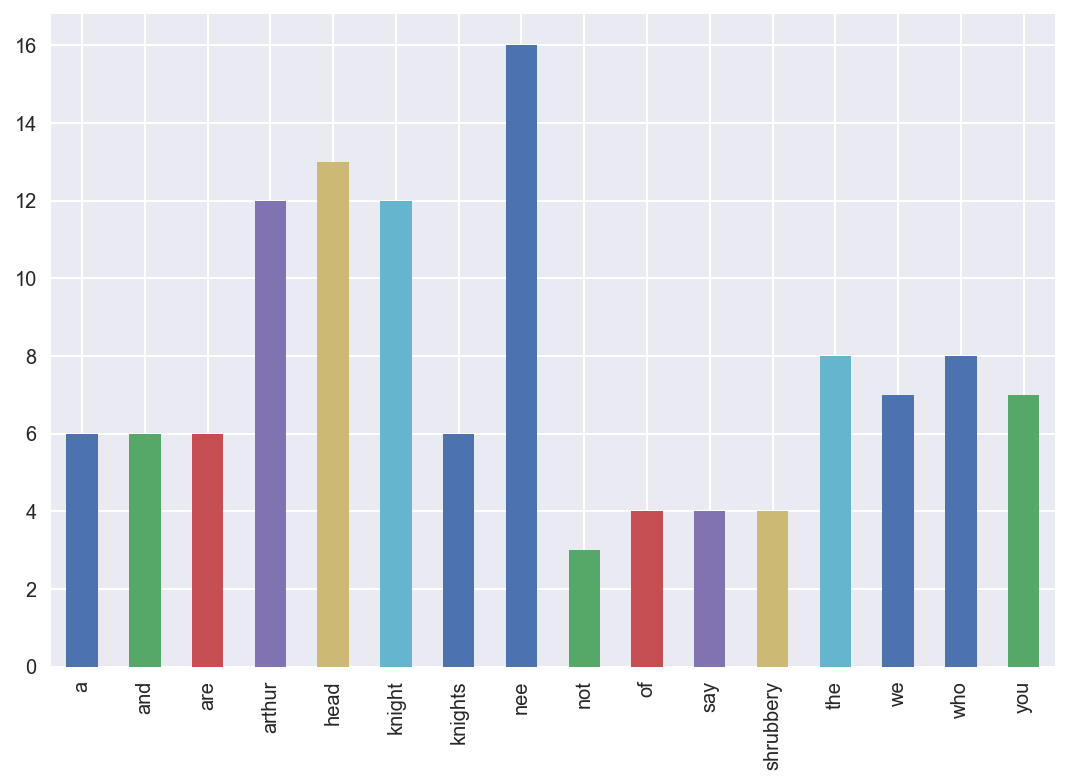

In [12]:
words.plot(kind='bar');

## Indexation et slicing

L'indexation et le slicing est une sorte de mélange entre les listes et les dictionnaires :

- `series[index]` pour accéder à la donnée correspondant à `index`
- `series[i]` où `i` est un entier qui suit les règles de l'indexation en python

Nombre d'occurrences de la chaîne `nee`

In [13]:
print(words.index)  # Pour rappel
words["nee"]

Index(['a', 'and', 'are', 'arthur', 'head', 'knight', 'knights', 'nee', 'not',
       'of', 'say', 'shrubbery', 'the', 'we', 'who', 'you'],
      dtype='object')


16

Trois dernières données de la série

In [14]:
words[-3:]

we     7
who    8
you    7
dtype: int64

## On veut ordonner la série



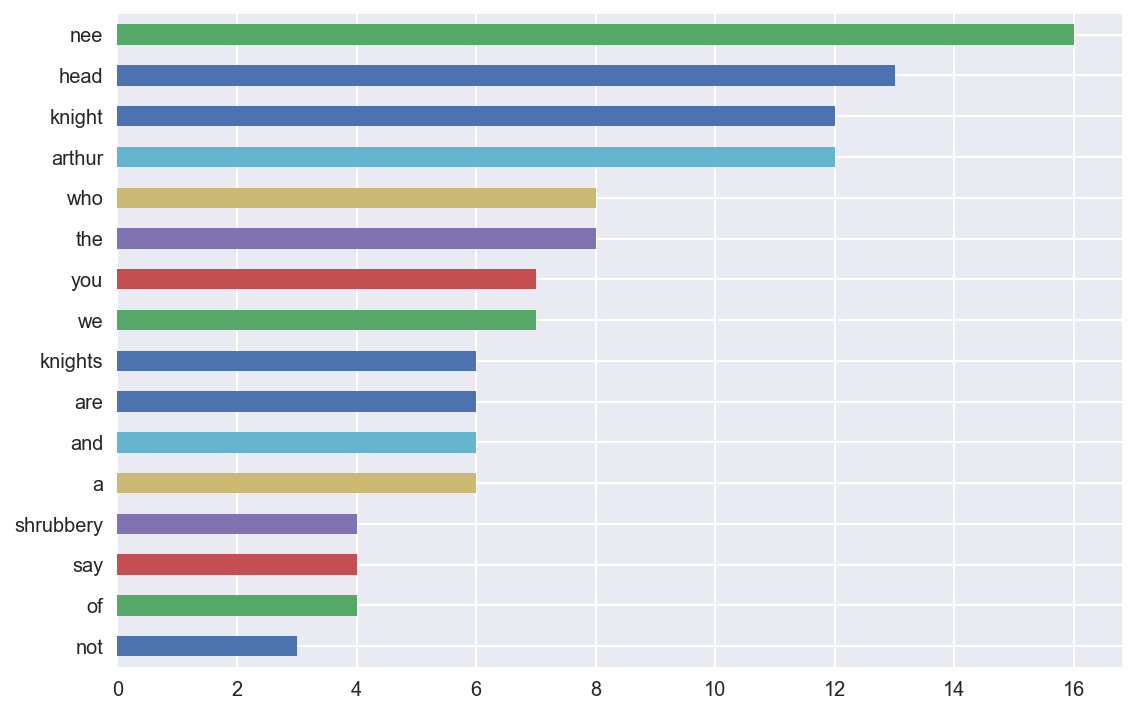

In [15]:
words.sort_values(inplace=True)
words.plot(kind='barh');  # On change pour un histogramme horizontal

# Les *Pandas Dataframes*

- C'est la structure de base de Pandas
- un *Dataframe* est une structure de données tabulées à deux dimensions, potentiellement hétérogène
- un *Dataframe* est constitué de lignes et colonnes portant des étiquettes
- C'est un peu un "dictionnaire de *Series*".

## Un exemple avec les arbres de la ville de Strasbourg

Conformément à l'[ordonnance du 6 juin 2005](https://www.legifrance.gouv.fr/affichTexte.do;jsessionid=0498736F8F3B3936EDA857F095A5434A.tpdjo08v_3?cidTexte=JORFTEXT000000629684&categorieLien=id) (qui prolonge la loi CADA), la ville de Strasbourg a commencé à mettre en ligne ses données publiques.

En particulier des données sur ses arbres : https://www.strasbourg.eu/arbres-alignements-espaces-verts

On veut exploiter ces données. Pour ce faire, on va :

1. télécharger les données
2. les charger dans un *Dataframe*
3. les nettoyer/filtrer
4. les représenter graphiquement

On commence par définir une fonction qui télécharge et extrait une archive zip.

In [16]:
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile

def download_unzip(zipurl, destination):
    """Download zipfile from URL and extract to destination"""
    with urlopen(zipurl) as zipresp:
        with ZipFile(BytesIO(zipresp.read())) as zfile:
            zfile.extractall(destination)

On l'utilise pour télécharger l'archive des données ouvertes de la ville de Strasbourg.

In [17]:
download_unzip("https://www.strasbourg.eu/documents/976405/1168331/CUS_CUS_DEPN_ARBR.zip", ".")

On liste le contenu de l'archive

In [18]:
%ls -R arbres

CUS_CUS_DEPN_ARBR.csv


On charge le fichier csv comme un *Dataframe*.

In [19]:
arbres_all = pd.read_csv("arbres/CUS_CUS_DEPN_ARBR.csv", encoding='latin', delimiter=";")
arbres_all

,Num point vert,point vert NOM_USUEL,point vert ADRESSE,point vert VILLE,Point vert Quartier usuel,point vert TYPOLOGIE,n°arbre SIG,Libellé_Essence,Diam fût à 1m,Hauteur arbre
0,450.0,Rue du Houblon,Houblon (rue du),STRASBOURG,CENTRE,ACCE - Accompagnement de cours d'eau,15783,Tilia x 'Euchlora',25,8
1,450.0,Rue du Houblon,Houblon (rue du),STRASBOURG,CENTRE,ACCE - Accompagnement de cours d'eau,15784,Tilia x 'Euchlora',8,"6,5"
2,450.0,Rue du Houblon,Houblon (rue du),STRASBOURG,CENTRE,ACCE - Accompagnement de cours d'eau,15785,Tilia x 'Euchlora',33,"7,5"
3,450.0,Rue du Houblon,Houblon (rue du),STRASBOURG,CENTRE,ACCE - Accompagnement de cours d'eau,15786,Tilia x 'Euchlora',23,9
...,...,...,...,...,...,...,...,...,...,...
79134,859.0,Krummerort,Oberjaegerhof (route de l'),STRASBOURG,STOCKFELD,ACJF - Accompagnement de jardins familiaux,87652,Picea abies,30,10
79135,859.0,Krummerort,Oberjaegerhof (route de l'),STRASBOURG,STOCKFELD,ACJF - Accompagnement de jardins familiaux,87653,Picea abies,30,10
79136,859.0,Krummerort,Oberjaegerhof (route de l'),STRASBOURG,STOCKFELD,ACJF - Accompagnement de jardins familiaux,87654,Picea abies,30,10
79137,859.0,Krummerort,Oberjaegerhof (route de l'),STRASBOURG,STOCKFELD,ACJF - Accompagnement de jardins familiaux,87655,Picea abies,30,10


In [20]:
print("{} arbres recensés !".format(len(arbres_all)))

79138 arbres recensés !


On commence par lister les villes citées.

In [21]:
print(set(arbres_all['point vert VILLE']))

{nan, 'WANTZENAU (LA)', 'LIPSHEIM', 'ECKWERSHEIM', 'SCHILTIGHEIM', 'ESCHAU', 'ILLKIRCH-GRAFFENSTADEN', 'REICHSTETT', 'LINGOLSHEIM', 'MUNDOLSHEIM', 'HOENHEIM', 'SOUFFELWEYERSHEIM', 'NIEDERHAUSBERGEN', 'OBERHAUSBERGEN', 'BISCHHEIM', 'FEGERSHEIM', 'ECKBOLSHEIM', 'VENDENHEIM', 'GEISPOLSHEIM', 'PLOBSHEIM', 'OSTWALD', 'OBERSCHAEFFOLSHEIM', 'LAMPERTHEIM', 'WOLFISHEIM', 'ENTZHEIM', 'HOLTZHEIM', 'BLAESHEIM', 'MITTELHAUSBERGEN', 'WANTZENAU (La)', 'STRASBOURG'}


On ne s'intéresse qu'à la ville de Strasbourg

In [22]:
arbres = arbres_all[arbres_all['point vert VILLE'] ==  "STRASBOURG"]
print("Il ne reste plus que {} arbres.".format(len(arbres)))

Il ne reste plus que 64624 arbres.


On enlève les données incomplètes.

In [23]:
arbres = arbres.dropna(axis=0, how='any')
print("Il ne reste plus que {} arbres.".format(len(arbres)))

Il ne reste plus que 61382 arbres.


On extrait la série des essences.

In [24]:
#essences = set([essence for essence in arbres['Libellé_Essence'] if type(essence) is str])
essences = set(arbres['Libellé_Essence'])
print("Il y a {} essences différentes !".format(len(essences)))

Il y a 456 essences différentes !


Les 5 premières dans l'ordre alphabétique :

In [25]:
sorted(list(essences))[:5]

['Abies (sp non determinée)',
 'Abies alba',
 'Abies cephalonica',
 'Abies concolor',
 'Abies grandis']

C'est bientôt Noël, on se limite aux sapins !

In [26]:
sapins = arbres[arbres['Libellé_Essence'].str.match("^Abies")]
sapins

,Num point vert,point vert NOM_USUEL,point vert ADRESSE,point vert VILLE,Point vert Quartier usuel,point vert TYPOLOGIE,n°arbre SIG,Libellé_Essence,Diam fût à 1m,Hauteur arbre
2656,620.0,Parc des Contades,Hirschler (rue René),STRASBOURG,CONSEIL-XV,PARC - Parcs,20379,Abies concolor,26,14
2657,620.0,Parc des Contades,Hirschler (rue René),STRASBOURG,CONSEIL-XV,PARC - Parcs,20380,Abies concolor,23,"13,5"
9235,704.0,Groupe scolaire Ampère,"Wattwiller (39, rue de)",STRASBOURG,NEUDORF,EESE2 - Espaces des établissements sociaux et ...,25143,Abies alba,10,6
9575,1151.0,Groupe scolaire Charles Adolphe Wurtz,"Rieth (51, rue du)",STRASBOURG,CRONENBOURG,EESE2 - Espaces des établissements sociaux et ...,44237,Abies nordmanniana,10,4
...,...,...,...,...,...,...,...,...,...,...
75935,318.0,Parc de la Citadelle -(01)- Secteur Centre et Est,Belges (quai des),STRASBOURG,ESPLANADE,PARC - Parcs,11419,Abies nordmanniana,38,"18,6"
75940,318.0,Parc de la Citadelle -(01)- Secteur Centre et Est,Belges (quai des),STRASBOURG,ESPLANADE,PARC - Parcs,11424,Abies concolor,28,"11,6"
75941,318.0,Parc de la Citadelle -(01)- Secteur Centre et Est,Belges (quai des),STRASBOURG,ESPLANADE,PARC - Parcs,11425,Abies concolor,18,"5,4"
78276,997.0,Parc de Pourtalès,Mélanie (rue),STRASBOURG,ROBERTSAU,PARC - Parcs,40616,Abies alba,29,16


On trace leur répartition

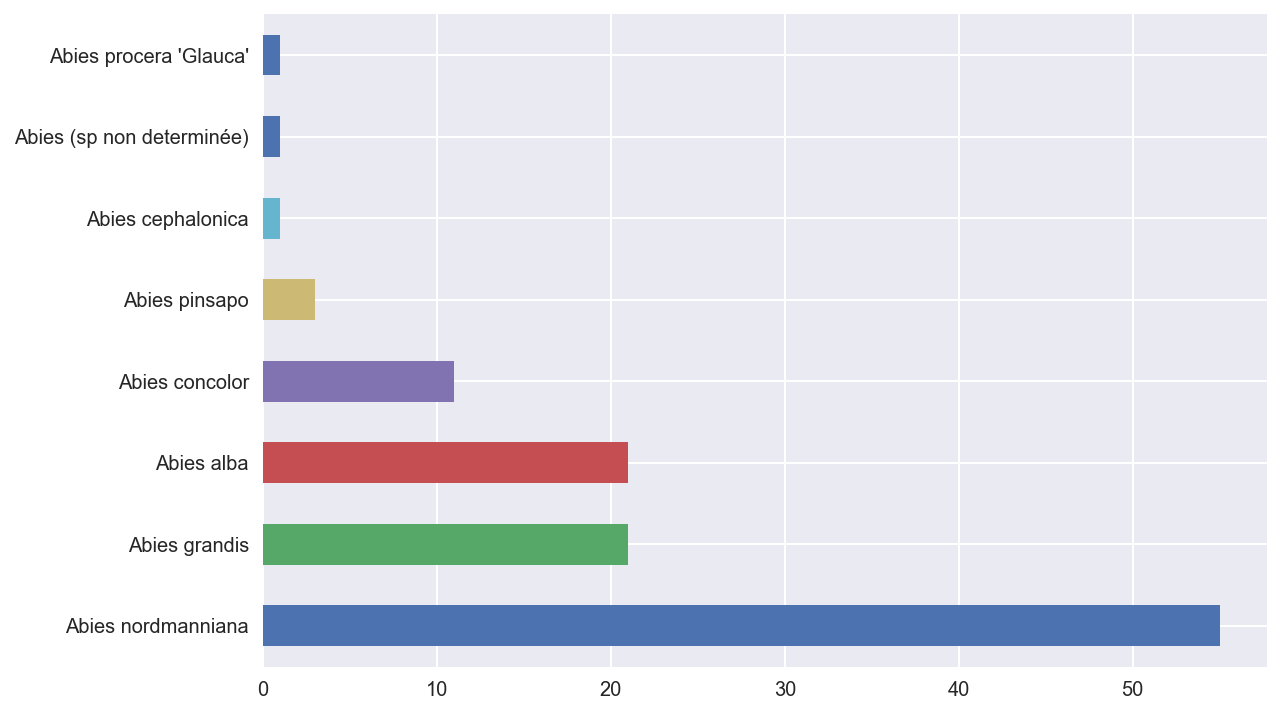

In [27]:
sapins['Libellé_Essence'].value_counts().plot("barh");

# Représentation géographique

On voudrait maintenant représenter la répartition des arbres par quartiers.

On utilise à nouveau les données ouvertes de la ville de Strasbourg, cette fois-ci concernant les quartiers : https://www.strasbourg.eu/decoupage-15-quartiers

On télécharge, on extrait l'archive et on liste son contenu.

In [28]:
download_unzip("https://www.strasbourg.eu/documents/976405/1168339/CUS_CUS_DUAH_QUART.zip", "quartiers")
%ls -R quartiers

SHP/ TAB/

quartiers/SHP:
Quartiers_Strasbourg_15.dbf  Quartiers_Strasbourg_15.shp
Quartiers_Strasbourg_15.prj  Quartiers_Strasbourg_15.shx

quartiers/TAB:
quartiers_strasbourg_15.DAT  quartiers_strasbourg_15.MAP
quartiers_strasbourg_15.ID   quartiers_strasbourg_15.TAB
quartiers_strasbourg_15.IND


C'est le fichier `.shp` qui nous intéresse.

À ce stade, nous avons besoin des bibliothèques [GeoPandas](http://geopandas.org/) et [Folium](https://folium.readthedocs.io/en/latest/) que l'on installe avec pip.

On commence par installer pip, le gestionnaire de paquets Python.

In [29]:
from urllib.request import urlretrieve

urlretrieve("https://bootstrap.pypa.io/get-pip.py", "get-pip.py")
%run get-pip.py

Requirement already up-to-date: pip in /Users/boileau/anaconda3/lib/python3.6/site-packages


On installe les paquets nécessaires dans le kernel python courant.

In [30]:
import sys
!{sys.executable} -m pip install geopandas folium

On charge le fichier qui nous intéresse.

In [31]:
import geopandas as gpd
quartiers = gpd.read_file("quartiers/SHP/Quartiers_Strasbourg_15.shp")
print("quartiers est de type {}.".format(type(quartiers)))
quartiers

Failed to auto identify EPSG: 7
quartiers est de type <class 'geopandas.geodataframe.GeoDataFrame'>.


,QUARTIER,geometry
0,Orangerie_Conseil_des_XV,"POLYGON ((999397.4837428499 113350.8592091265,..."
1,Bourse_Esplanade_Krutenau,"POLYGON ((999659.6719227299 112595.825712968, ..."
2,Centre_ville,"POLYGON ((998119.3101221699 111761.009390834, ..."
3,Gare_Tribunal,"(POLYGON ((998704.80045375 114095.0660172085, ..."
...,...,...
11,Neuhof,"POLYGON ((1000132.23752052 106447.990164587, 1..."
12,Neudorf,"POLYGON ((998254.67494737 111316.5657283995, 9..."
13,Port_du_Rhin,"POLYGON ((1001417.2792827 111910.485118949, 10..."
14,Neuhof2,"POLYGON ((999790.99078821 102605.2401741405, 9..."


Avec Folium, on commence par représenter ces données géographiques sur un fond de cartes.

In [32]:
import folium

# On crée une carte initialement centrée sur Strasbourg
STRASBOURG_COORD = (48.58, 7.75)
stras_map = folium.Map(STRASBOURG_COORD, zoom_start=11, tiles='cartodbpositron')

# On ajoute les données des quartiers
folium.GeoJson(quartiers).add_to(stras_map)

# On enregistre dans un fichier html
stras_map.save('stras_map.html')

# On trace dans le notebook
display(stras_map)

À l'emplacement de ces quartiers, on souhaite représenter une échelle de couleur en fonction de la densité d'arbres.

On constate que les noms de quartiers sont différents de ceux du jeu de données sur les arbres.

In [33]:
print(set(quartiers["QUARTIER"]), len(quartiers["QUARTIER"]))
print(set(arbres['Point vert Quartier usuel']), len(set(arbres['Point vert Quartier usuel'])))

{'Hautepierre_Poteries', 'Robertsau_Wacken', 'Orangerie_Conseil_des_XV', 'Koenigshoffen', 'Port_du_Rhin', 'Meinau', 'Bourse_Esplanade_Krutenau', 'Neuhof', 'Gare_Tribunal', 'Neuhof2', 'Neudorf', 'Cronenbourg', 'Montagne_Verte', 'Centre_ville', 'Elsau'} 15
{'NEUDORF', 'NEUHOF', 'BOURSE', 'KRUTENAU', 'PLAINE DES BOUCHERS', 'CRONENBOURG', 'POLYGONE', 'KOENIGSHOFFEN', 'ORANGERIE', 'CONSEIL-XV', 'HAUTEPIERRE', 'ESPLANADE', 'ELSAU', 'PORT DU RHIN', 'STOCKFELD', 'PORTE DE SCHIRMECK', 'MEINAU', 'TRIBUNAL', 'ROBERTSAU', 'MUSAU', 'CENTRE', 'GARE', 'MONTAGNE VERTE', 'WACKEN'} 24


On commence par mettre en minuscule les noms contenus dans le Dataframe `quartiers` et à remplacer les espaces par des underscores

In [34]:
quartiers["QUARTIER"] = quartiers["QUARTIER"].str.lower()
quartiers["QUARTIER"] = quartiers["QUARTIER"].str.replace('_', ' ')

À présent, on  convertit les noms dans le Dataframe `arbres` en supposant les correspondances ci-dessous.

In [35]:
convertion_dict = {"CENTRE": "centre ville",
                   ("BOURSE", "ESPLANADE", "KRUTENAU"): "bourse esplanade krutenau",
                   ("ORANGERIE", "CONSEIL-XV"): "orangerie conseil des xv",
                   ("GARE", "TRIBUNAL"): "gare tribunal",
                   ("HAUTEPIERRE", "POTERIE"): "hautepierre poteries",
                   "MUSAU": "NEUDORF",
                   "STOCKFELD": "NEUHOF2",
                   "PLAINE DES BOUCHERS": "MEINAU",
                   "POLYGONE": "NEUHOF",
                   "PORTE DE SCHIRMECK": "ELSAU",
                   ("ROBERTSAU", "WACKEN"): "ROBERTSAU WACKEN"}

for k, v in convertion_dict.items():
    arbres['Point vert Quartier usuel'] = arbres['Point vert Quartier usuel'].replace(to_replace=k, value=v)

arbres['Point vert Quartier usuel'] = arbres['Point vert Quartier usuel'].str.lower()
arbres

,Num point vert,point vert NOM_USUEL,point vert ADRESSE,point vert VILLE,Point vert Quartier usuel,point vert TYPOLOGIE,n°arbre SIG,Libellé_Essence,Diam fût à 1m,Hauteur arbre
0,450.0,Rue du Houblon,Houblon (rue du),STRASBOURG,centre ville,ACCE - Accompagnement de cours d'eau,15783,Tilia x 'Euchlora',25,8
1,450.0,Rue du Houblon,Houblon (rue du),STRASBOURG,centre ville,ACCE - Accompagnement de cours d'eau,15784,Tilia x 'Euchlora',8,"6,5"
2,450.0,Rue du Houblon,Houblon (rue du),STRASBOURG,centre ville,ACCE - Accompagnement de cours d'eau,15785,Tilia x 'Euchlora',33,"7,5"
3,450.0,Rue du Houblon,Houblon (rue du),STRASBOURG,centre ville,ACCE - Accompagnement de cours d'eau,15786,Tilia x 'Euchlora',23,9
...,...,...,...,...,...,...,...,...,...,...
79134,859.0,Krummerort,Oberjaegerhof (route de l'),STRASBOURG,neuhof2,ACJF - Accompagnement de jardins familiaux,87652,Picea abies,30,10
79135,859.0,Krummerort,Oberjaegerhof (route de l'),STRASBOURG,neuhof2,ACJF - Accompagnement de jardins familiaux,87653,Picea abies,30,10
79136,859.0,Krummerort,Oberjaegerhof (route de l'),STRASBOURG,neuhof2,ACJF - Accompagnement de jardins familiaux,87654,Picea abies,30,10
79137,859.0,Krummerort,Oberjaegerhof (route de l'),STRASBOURG,neuhof2,ACJF - Accompagnement de jardins familiaux,87655,Picea abies,30,10


On vérifie que l'ensemble des quartiers est le même pour les deux Dataframes `quartiers` et `arbres`.

In [36]:
set(quartiers["QUARTIER"]) == set(arbres['Point vert Quartier usuel'])

True

On construit une série qui contient le nombre d'arbres par quartier.

In [37]:
arbres_quartiers = arbres['Point vert Quartier usuel'].value_counts()
arbres_quartiers.index = arbres_quartiers.index.str.lower()  # On met en minuscule le nom des quartiers

On trace le graphique en barres correspondant.

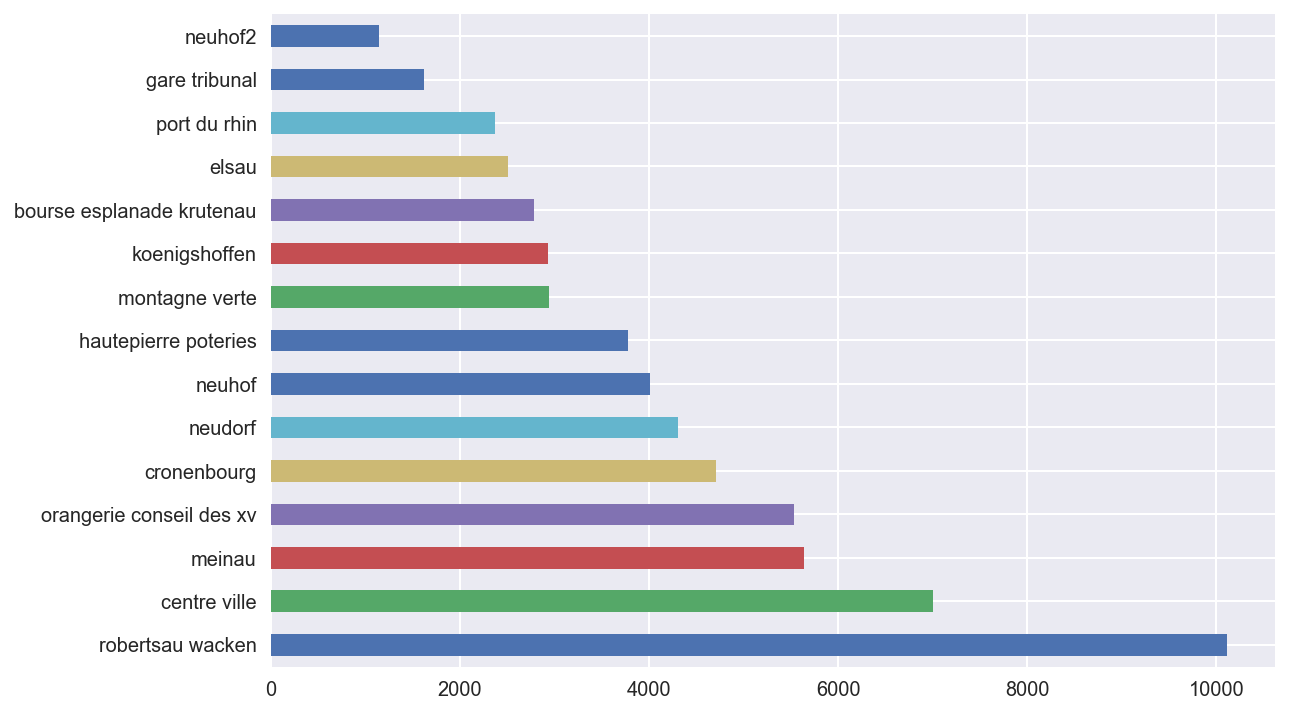

In [38]:
arbres_quartiers.plot(kind='barh');

On construit une nouvelle *Series* correspondant à l'aire de chaque quartier en $m^2$.

In [39]:
aires = quartiers.area
aires.index = quartiers["QUARTIER"]

On calcule la densité d'arbres par hectare.

In [40]:
densite = arbres_quartiers/aires*10000
densite

bourse esplanade krutenau    14.991937
centre ville                 39.056900
cronenbourg                  11.073549
elsau                        13.376071
                               ...    
neuhof2                       0.628030
orangerie conseil des xv     19.195449
port du rhin                  5.461125
robertsau wacken              5.604082
Length: 15, dtype: float64

On trace une carte colorée par la densité d'arbres.

In [41]:
stras_map.choropleth(geo_data=quartiers, 
             data=densite,
             key_on='feature.properties.QUARTIER',
             fill_color='YlGn',
             fill_opacity=0.5,
             line_opacity=0.2,
             legend_name=r"Nombre d\'arbres par hectare")
stras_map.save('stras_tree.html')
display(stras_map)